# 시가총액 데이터셋(marcap) 튜토리얼 - 종목별 분석

<img src="https://i.imgur.com/b9t5FAA.png?1" width="60%">

* 한국거래소(KRX)에서 일자별 시가총액 순위 데이터
* 1995-05-02 ~ 2020-12-31 (26년간), 1천만건 이상

#### 2018 - 2021 [FinanceData.KR]()

## 시가총액 데이터셋(marcap) 가져오기 

In [28]:
!git clone "https://github.com/FinanceData/marcap.git" marcap

fatal: destination path 'marcap' already exists and is not an empty directory.


## 데이터 전체 읽기

In [29]:
from marcap import marcap_data

df_marcap = marcap_data('1995-05-02', '2021-01-15')
df_marcap

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
1995-05-02,015760,한국전력공사,KOSPI,NaN,27400,2,-400,-1.4400,27600,27800,27400,118190,3255694000,16872679291000,615791215,STK,1
1995-05-02,005930,삼성전자,KOSPI,NaN,119500,2,-1000,-0.8300,121000,121000,118500,139560,16676735000,6497053077500,54368645,STK,2
1995-05-02,005490,포항종합제철,KOSPI,NaN,65500,2,-300,-0.4600,65800,66200,65400,65970,4334472000,6150568555000,93901810,STK,3
1995-05-02,000200,대우중공업,KOSPI,NaN,9800,1,300,3.1600,9500,9840,9500,288380,2805133500,3500638978200,357208059,STK,4
1995-05-02,002610,엘지전자,KOSPI,NaN,31700,2,-300,-0.9400,32000,32000,31700,171460,5452050000,2521027012200,79527666,STK,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,267810,앙츠,KONEX,일반기업부,1550,2,-250,-13.8900,1550,1600,1550,1504,2331610,2397850000,1547000,KNX,2525
2021-01-15,225850,미애부,KONEX,일반기업부,670,3,0,0.0000,670,670,670,50,33500,2232663110,3332333,KNX,2526
2021-01-15,224020,에스케이씨에스,KONEX,일반기업부,650,1,70,12.0700,650,650,650,1,650,1998750000,3075000,KNX,2528


In [30]:
len(df_marcap)

11099879

## 환경 설정 - matplotlib 한글 (구글 Colab)

구글 Colab (혹은 우분투 리눅스)의 경우 별도의 한글 폰트 설치가 필요합니다. matplotlib에서 모든 FFT(True Type Font)를 가져다 사용할 수 있습니다.

여기서는 명령라인에서 폰트를 가져다 설치합니다.

matplotlib 전역 환경을 파라미터들을 설정해 줍니다. 차트 이미지의 크기, 폰트, 라인 속성 등을 지정할 수 있습니다.

한글 폰트 설치

아래 셀을 실행하고, 런타임 재시작 (메뉴의 "런타임 / 런타임 다시 시작...") 후
다시 한번 아래 셀을 실행합니다.

'한글 테스트' 가 표시되면 성공한 것입니다.

Text(0.5, 1.0, '한글 테스트')

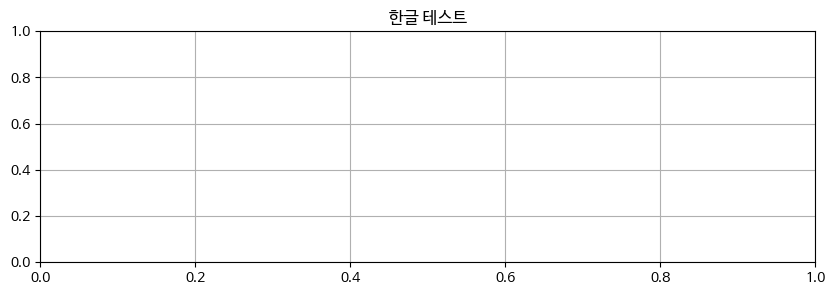

In [31]:
# 한글 폰트 설치와 폰트 캐시 재설정
!apt-get install -y -qq fonts-nanum
!rm -rf ~/.cache/matplotlib/*

# matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 테스트')

## 환경 설정 - 판다스 출력 자리수

숫자가 커서 과학적 표기법(10의 승수로 표현)으로 표시되면 오히려 읽기 좋지 않은 경우가 있습니다.

pandas에서 수치값을 출력할 때 과학적 표기법을 사용하지 않고, 소수점 이하 몇 자리 출력할 것인지를 정해줍니다.

In [32]:
import pandas as pd
pd.options.display.float_format = '{:.1f}'.format

## 개별종목의 시가총액

개별 종목의 시가총액은 다음과 같이 얻을 수 있습니다.

종목코드가 '005930'(삼성전자)인 데이터 만 추출하려면 다음과 같이 합니다. 

In [33]:
df_005930 = df_marcap[df_marcap['Code']=='005930']
df_005930

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
1995-05-02,005930,삼성전자,KOSPI,NaN,119500,2,-1000,-0.8,121000,121000,118500,139560,16676735000,6497053077500,54368645,STK,2
1995-05-03,005930,삼성전자,KOSPI,NaN,123500,1,4000,3.4,119500,126500,119500,382980,47649710000,6714527657500,54368645,STK,2
1995-05-04,005930,삼성전자,KOSPI,NaN,122500,2,-1000,-0.8,124000,124500,122000,175590,21609210000,6660159012500,54368645,STK,2
1995-05-06,005930,삼성전자,KOSPI,NaN,122000,2,-500,-0.4,122000,123500,122000,47440,5810535000,6632974690000,54368645,STK,2
1995-05-08,005930,삼성전자,KOSPI,NaN,121000,2,-1000,-0.8,122000,122000,120500,91810,11127115000,6578606045000,54368645,STK,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,005930,삼성전자,KOSPI,NaN,91000,1,2200,2.5,90000,96800,89500,90306177,8379237727064,543250212050000,5969782550,STK,1
2021-01-12,005930,삼성전자,KOSPI,NaN,90600,2,-400,-0.4,90300,91400,87800,48682416,4362546108950,540862299030000,5969782550,STK,1
2021-01-13,005930,삼성전자,KOSPI,NaN,89700,2,-900,-1.0,89800,91200,89100,36068848,3244066562850,535489494735000,5969782550,STK,1


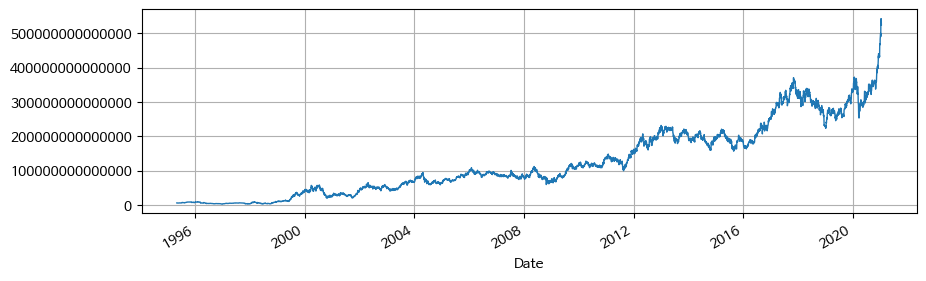

In [34]:
df_005930['Marcap'].plot()

In [35]:
df_005930['Marcap'].tail()

Date
2021-01-11    543250212050000
2021-01-12    540862299030000
2021-01-13    535489494735000
2021-01-14    535489494735000
2021-01-15    525340864400000
Name: Marcap, dtype: int64

2021년 1월 15일 현재 삼성전자의 시가총액은 525조 3,408억원 입니다.

## 다수의 종목 다루기

다수의 종목을 다루고자 할 때 다양한 방법이 있겠으나 여기서는 딕셔너리를 사용해 봅니다.

다음과 같이 대표적인 종목들로 관심 종목 목록을 딕셔너리로 구성합니다.

In [36]:
fav_stocks = {
  '005930': '삼성전자', 
  '005380': '현대차', 
  '015760': '한국전력', 
  '005490': 'POSCO', 
  '105560': 'KB금융',
}

종목코드와 종목명을 매핑하려면 딕셔너리를 그대로 사용할 수 있습니다.

종목코드와 종목명을 매핑하는 딕셔너리이기 때문에 다양한 용도로 사용할 수 있습니다. 예를 들어, dict.key()를 사용하여 종목코드만 추출할 수 있죠.

In [37]:
fav_stocks.keys()

dict_keys(['005930', '005380', '015760', '005490', '105560'])

시가종액 데이터셋에서 다수의 종목을 추출하려면 [Series.isin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html)을 활용하면 좋습니다.

In [38]:
# 다수의 종목 필터링
df_stocks = df_marcap[df_marcap['Code'].isin(fav_stocks.keys())]
df_stocks

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
1995-05-02,015760,한국전력공사,KOSPI,NaN,27400,2,-400,-1.4,27600,27800,27400,118190,3255694000,16872679291000,615791215,STK,1
1995-05-02,005930,삼성전자,KOSPI,NaN,119500,2,-1000,-0.8,121000,121000,118500,139560,16676735000,6497053077500,54368645,STK,2
1995-05-02,005490,포항종합제철,KOSPI,NaN,65500,2,-300,-0.5,65800,66200,65400,65970,4334472000,6150568555000,93901810,STK,3
1995-05-02,005380,현대자동차,KOSPI,NaN,46200,2,-300,-0.7,46500,46900,46000,79230,3667615000,1854048273000,40130915,STK,7
1995-05-03,015760,한국전력공사,KOSPI,NaN,29000,4,1600,5.8,27600,29000,27400,690270,19907009000,17857945235000,615791215,STK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,005930,삼성전자,KOSPI,NaN,88000,2,-1700,-1.9,89800,91800,88000,33431809,2975231937664,525340864400000,5969782550,STK,1
2021-01-15,005380,현대차,KOSPI,NaN,240000,2,-10500,-4.2,252000,255000,239000,3915078,958824239500,51280364880000,213668187,STK,6
2021-01-15,005490,POSCO,KOSPI,NaN,275000,2,-7000,-2.5,283500,286500,274000,372253,103648626000,23976379625000,87186835,STK,16


이렇게 필터링된 데이터를 피벗(pivot)하여 종목별(컬럼) 날짜별 시가총액을 구합니다.

In [39]:
df_stocks = df_marcap[df_marcap['Code'].isin(fav_stocks.keys())]

marcap_stocks = df_stocks.pivot_table(index='Date', columns='Code', values='Marcap')
marcap_stocks.rename(columns=fav_stocks, inplace=True)
marcap_stocks

Code,현대차,POSCO,삼성전자,한국전력,KB금융
Date,,,,,
1995-05-02,1854048273000.0,6150568555000.0,6497053077500.0,16872679291000.0,nan
1995-05-03,1938323194500.0,6516785614000.0,6714527657500.0,17857945235000.0,nan
1995-05-04,1946349377500.0,6544956157000.0,6660159012500.0,18473736450000.0,nan
1995-05-06,1974441018000.0,6573126700000.0,6632974690000.0,18473736450000.0,nan
1995-05-08,1958388652000.0,6479224890000.0,6578606045000.0,18042682599500.0,nan
...,...,...,...,...,...
2021-01-11,57156240022500.0,24761061140000.0,543250212050000.0,16915753428950.0,19085583528000.0
2021-01-12,55767396807000.0,24150753295000.0,540862299030000.0,16819458817400.0,19210325904000.0
2021-01-13,55340060433000.0,24717467722500.0,535489494735000.0,16530574982750.0,19667714616000.0


여러 종목의 시가총액을 한번에 그려볼 수 있습니다

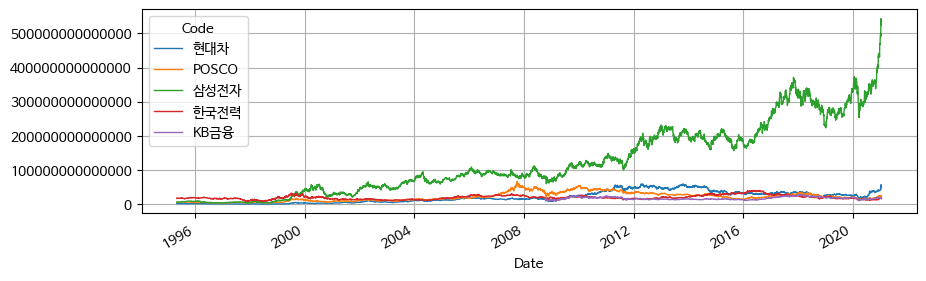

In [40]:
marcap_stocks.plot()

삼성전자의 시가총액이 너무 커서 비교하기가 어렵군요. 삼성전자만 별도의 축(secondary_y)을 쓰도록 지정하여 서로 상대적일 비교를 쉽게 합니다.

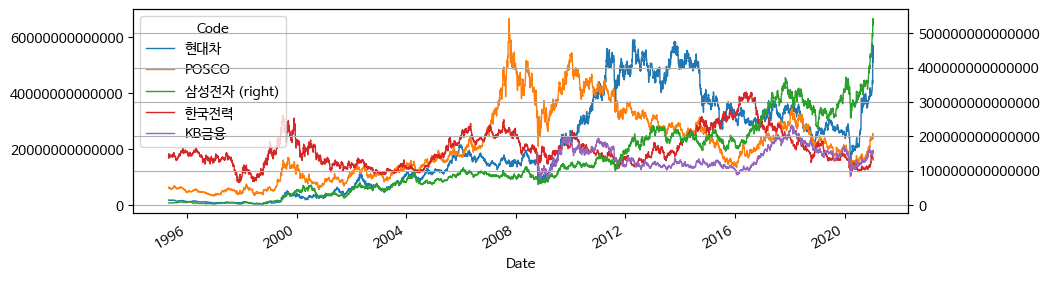

In [41]:
marcap_stocks.plot(secondary_y=['삼성전자'])

팬데믹 이후 상대적으로 더 가파르게 성장하는 기업들이 있습니다.

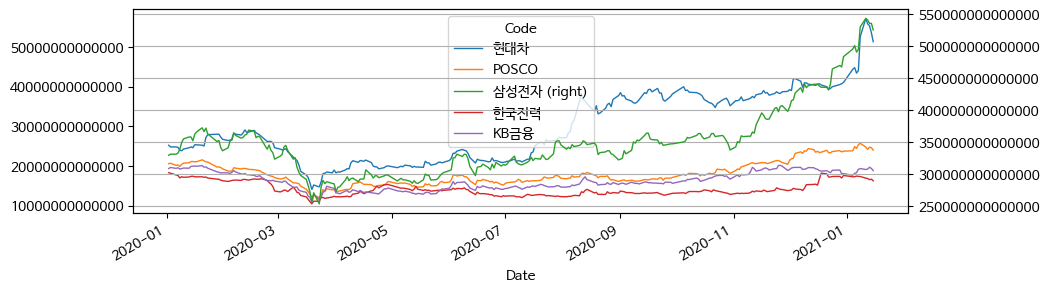

In [42]:
marcap_stocks['2020':].plot(secondary_y=['삼성전자'])

## 일별 시가총액 비중(비율)

훨씬더 원활하게 상대적인 비교를 위해 비중(비율)을 사용하는 것도 좋은 방법입니다.

종목별 시가총액을 일자별 시가총액으로 나누어 해당 날짜의 시가총액 비중을 구할 수 있습니다.

In [43]:
pd.options.display.float_format = '{:.4f}'.format # 소수점 이하 4자리 출력

In [44]:
# 일별 상장종목시가총액
marcap_daily = df_marcap.groupby('Date').sum()['Marcap']
marcap_daily

Date
1995-05-02     134713479923960
1995-05-03     137255450392250
1995-05-04     137395277384830
1995-05-06     137122266028070
1995-05-08     136361070157380
                    ...       
2021-01-11    2556140698402270
2021-01-12    2539389518593471
2021-01-13    2555060321900568
2021-01-14    2556402104529020
2021-01-15    2508508338186183
Name: Marcap, Length: 6517, dtype: int64

In [45]:
marcap_stocks_ratio = marcap_stocks.divide(marcap_daily, axis=0)
marcap_stocks_ratio

Code,현대차,POSCO,삼성전자,한국전력,KB금융
Date,,,,,
1995-05-02,0.0138,0.0457,0.0482,0.1252,nan
1995-05-03,0.0141,0.0475,0.0489,0.1301,nan
1995-05-04,0.0142,0.0476,0.0485,0.1345,nan
1995-05-06,0.0144,0.0479,0.0484,0.1347,nan
1995-05-08,0.0144,0.0475,0.0482,0.1323,nan
...,...,...,...,...,...
2021-01-11,0.0224,0.0097,0.2125,0.0066,0.0075
2021-01-12,0.0220,0.0095,0.2130,0.0066,0.0076
2021-01-13,0.0217,0.0097,0.2096,0.0065,0.0077


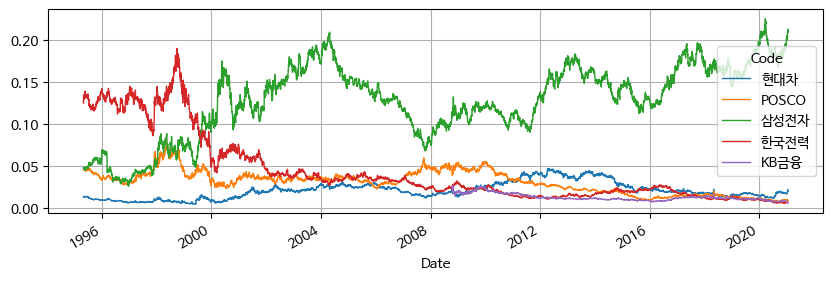

In [46]:
marcap_stocks_ratio.plot()

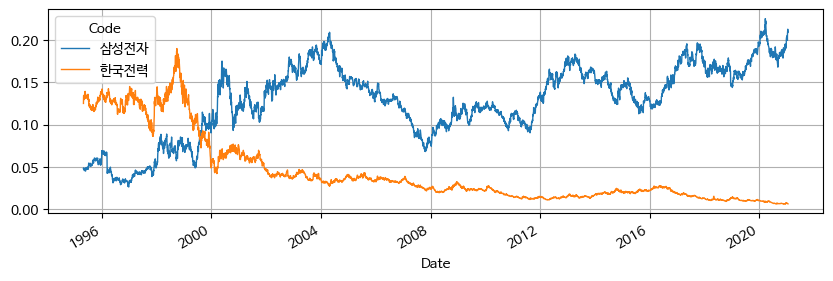

In [47]:
marcap_stocks_ratio[['삼성전자', '한국전력']].plot()

1990년대 말을 기점으로 우리나라 산업이 인프라(전력)에서 전기전자로 전환되는 모습을 시총1위 기업의 변화로 극명하게 살펴볼 수 있습니다.


삼성전자의 시총이 다른 종목들에 비해 너무 크기 때문에 나머지 종목간에 비교가 쉽지 않습니다.

'삼성전자'를 제외한 나머지 종목들을 지정하려 차트로 그립니다.

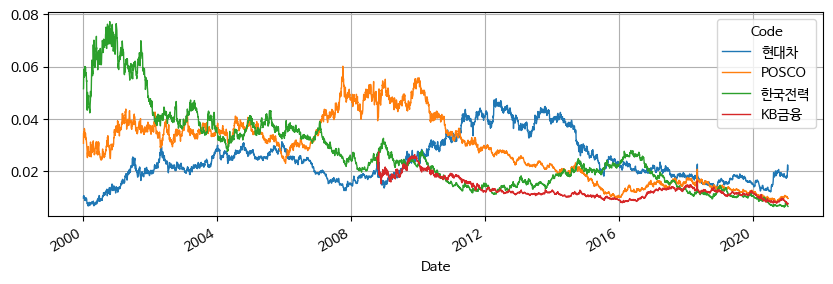

In [48]:
cols = list(marcap_stocks_ratio.columns) 
cols.remove('삼성전자')

marcap_stocks_ratio['2000':][cols].plot()

2010~2012년 동안 다른 종목들의 시총과 달리 현대차의 시총이 지속적으로 늘어나는 점이 눈에 띕니다.

2002년~2013년까지 현대차와 POSCO가 역상관을 보여주는 것도 흥미롭습니다.



## 시가총액 통계량

2000년 이후 시가총액 비중 데이터에 대한 간략한 통계량을 다음과 같이 산출할 수 있습니다.


In [49]:
marcap_stocks_ratio['2000':].describe()

Code,현대차,POSCO,삼성전자,한국전력,KB금융
count,5194.0000,5194.0000,5191.0000,5194.0000,3034.0000
mean,0.0241,0.0285,0.1433,0.0265,0.0132
std,0.0088,0.0122,0.0300,0.0150,0.0039
min,0.0067,0.0082,0.0684,0.0062,0.0073
25%,0.0179,0.0160,0.1199,0.0146,0.0108
50%,0.0220,0.0297,0.1459,0.0228,0.0120
75%,0.0280,0.0366,0.1658,0.0352,0.0143
max,0.0477,0.0601,0.2255,0.0772,0.0274


삼성전자의 2001년 이후 6.8% ~ 22.5% (평균 14.3%)의 시가총액 비중을 유지하고 있습니다. 

시가총액 비중 데이터의 표준편차(std)값이 가장 큰 종목이 `삼성전자`, 가장 작은 종목이 `KB금융` 입니다. 즉, 시가총액 비중의 변화가 '삼성전자'가 가장 컸고, 'KB금융'이 가장 작았다는 것을 알 수 있죠.

In [50]:
marcap_stocks_ratio['2000':].describe().loc['std',:].sort_values(ascending=False)

Code
삼성전자    0.0300
한국전력    0.0150
POSCO   0.0122
현대차     0.0088
KB금융    0.0039
Name: std, dtype: float64

## 요약
시가총액 데이터셋(marcap)과 padas를 사용하여 
개별종목의 데이터를 가져와 분석할 수 있고, 
또 관심있는 종목들을 선별하여 분석해 볼 수 있습니다.

#### 2018 - 2021 [FinanceData.KR]()